# UEQ
## Loadings

In [1]:
## loadings
library(psychometric)
library(readxl)
data <- as.data.frame(read_excel("UEQ-SK (data).xlsx"))[,1:27]
data <- data[,c(2:ncol(data),1)]

Loading required package: multilevel


Loading required package: nlme


Loading required package: MASS


In [3]:
data

obťažujúci pútavý nepochopiteľný pochopiteľný nápaditý tuctový intuitívny neintuitívny hodnotný menejcenný nudný vzrušujúci nezaujímavý zaujímavý nepredvídateľný predvídateľný rýchly pomalý moderný tradičný ⋯ motivujúci demotivujúci spĺňajúci očakávania nespĺňajúci očakávania neefektívny efektívny jasný mätúci nepraktický praktický prehľadný neprehľadný príťažlivý nepríťažlivý sympatický nesympatický konzervatívny inovatívny id 
 
 6 5 1 3 1 6 6 4 3 2 ⋯ 1 2 7 1 7 1 2 2 7 KDF 
 6 5 2 2 2 4 6 5 2 1 ⋯ 3 3 5 2 5 2 2 2 6 KDF 
 5 6 1 2 2 4 5 4 2 2 ⋯ 2 2 6 2 7 2 2 1 6 KDF 
 6 6 5 3 2 4 5 4 4 2 ⋯ 2 3 5 3 6 3 3 2 5 KDF 
 1 2 1 1 1 1 1 1 1 1 ⋯ 1 1 1 1 1 1 1 1 1 KUF 
 6 7 2 2 2 6 6 6 2 2 ⋯ 2 2 6 2 6 2 2 2 6 KUF 
 6 6 4 2 2 5 6 4 3 5 ⋯ 2 2 6 2 6 2 2 4 7 KUF 
 6 5 4 3 6 4 6 6 5 1 ⋯ 3 2 7 2 6 3 3 3 7 KUF 
 7 6 3 2 1 5 6 5 2 1 ⋯ 2 1 7 2 7 2 2 1 7 KUF 
 6 6 2 6 1 6 7 2 3 2 ⋯ 2 1 7 2 7 1 1 1 7 KUF 
 6 6 2 1 2 5 6 7 2 2 ⋯ 2 1 7 1 6 1 2 1 6 KUF 
 5 7 2 3 2 6 6 6 2 1 ⋯ 2 3 6 3 6 3 2 2 7 KUF 
 3 3 2 5 5 3 4 3 2 3 ⋯ 3 4 4 4 5 3 4 4 5 KUF 
 5 5 3 3 3 4 7 1 2 1 ⋯ 2 3 6 3 6 1 3 3 6 KUF

In [2]:
## dimensions of UEQ
dimensions <- c("Attractiveness", "Perspicuity", "Efficiency", "Dependability", "Stimulation", "Novelty")

Attractiveness <- c(1,12,14,16,24,25)
Perspicuity    <- c(2,4,13,21)
Efficiency     <- c(9,20,22,23)
Dependability  <- c(8,11,17,19)
Stimulation    <- c(5:7,18)
Novelty        <- c(3,10,15,26)

In [3]:
## the order of the positive and negative term for an item
positive <- c(1,2,6:8,11,13:16,20,22,26)
negative <- setdiff(1:26, positive)

In [4]:
## benchmark table
tabBM <- as.data.frame(matrix(NA, 6, 6))
colnames(tabBM) <- dimensions
rownames(tabBM) <- c("lower border", "bad", "below average", "above average", "good", "excellent")
tabBM[1,] <- -1
tabBM[2,] <- c(0.7, 0.64, 0.54, 0.78, 0.5, 0.3) +1
tabBM[3,] <- c(0.47, 0.44, 0.44, 0.36, 0.49, 0.41)
tabBM[4,] <- c(0.35, 0.48, 0.49, 0.34, 0.32, 0.34)
tabBM[5,] <- c(0.23, 0.34, 0.31, 0.17, 0.24, 0.35)
tabBM[6,] <- c(0.75, 0.6, 0.72, 0.85, 0.95, 1.1)

colors <- c("red", "orange", "green", "forestgreen", "darkgreen")

In [5]:
## define plot function with error bars
error.bar <- function(x, y, upper, lower=upper, length=0.1,...){
    if(length(x) != length(y) | length(y) !=length(lower) | length(lower) != length(upper))
    stop("vectors must be same length")
    arrows(x,y+upper, x, y-lower, angle=90, code=3, length=length, ...)
}

## Processing

In [6]:
## transformed values
DT <- as.data.frame(matrix(NA,nrow(data), ncol(data)))
colnames(DT) <- colnames(data)
DT[,1] <- data[,1]

for(i in 1:13){
    DT[,positive[i]] <- data[positive[i]] - 4
    DT[,negative[i]] <- 4 - data[negative[i]]
}

In [7]:
## table of means for each respondent
tab <- as.data.frame(matrix(NA, nrow(DT), 6))
colnames(tab) <- dimensions

tab$Attractiveness <- rowMeans(DT[,Attractiveness])
tab$Perspicuity    <- rowMeans(DT[,Perspicuity])
tab$Efficiency     <- rowMeans(DT[,Efficiency])
tab$Dependability  <- rowMeans(DT[,Dependability])
tab$Stimulation    <- rowMeans(DT[,Stimulation])
tab$Novelty        <- rowMeans(DT[,Novelty])

In [8]:
## means of all respondents
scales <- apply(tab, 2, mean)
stDev  <- apply(tab, 2, sd)

scales
stDev

Attractiveness 
 1.63095238095238 
 Perspicuity 
 1.19642857142857 
 Efficiency 
 1.76785714285714 
 Dependability 
 1.46428571428571 
 Stimulation 
 1.41071428571429 
 Novelty 
 1.71428571428571

Attractiveness 
 0.872609240408836 
 Perspicuity 
 0.915562938582321 
 Efficiency 
 0.749771027318736 
 Dependability 
 0.897952493909718 
 Stimulation 
 0.869389390369995 
 Novelty 
 0.656748567808626

In [9]:
## means for different groups of respondents
scales_KDF <- apply(tab[data$id=="KDF",], 2, mean)
scales_KUF <- apply(tab[data$id=="KUF",], 2, mean)

## Analysis

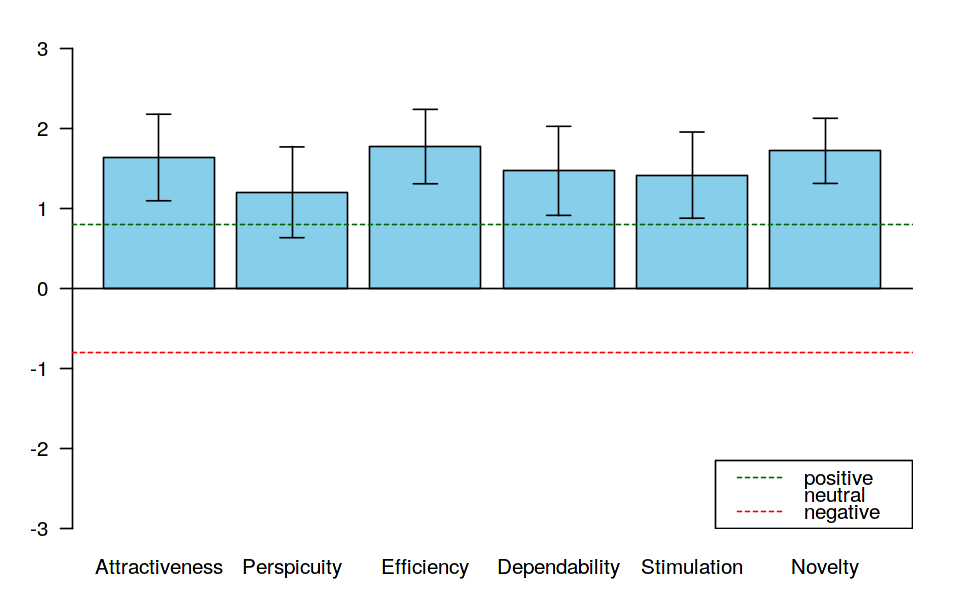

In [26]:
library(repr)
options(repr.plot.width=8, repr.plot.height=5)
## plot by dimensions
par(mar = c(3, 3, 2, 2))
plot <- barplot(scales, col = "skyblue", ylim = c(-3,3), las = 1)
error.bar(plot,scales, 1.96*stDev/sqrt(10))
abline(h = 0.8, col = "darkgreen", lty = 2)
abline(h = -0.8, col = "red", lty = 2)
abline(h=0)
legend("bottomright", c("positive","neutral", "negative"), lty = 2, col = c("darkgreen", "white", "red"))

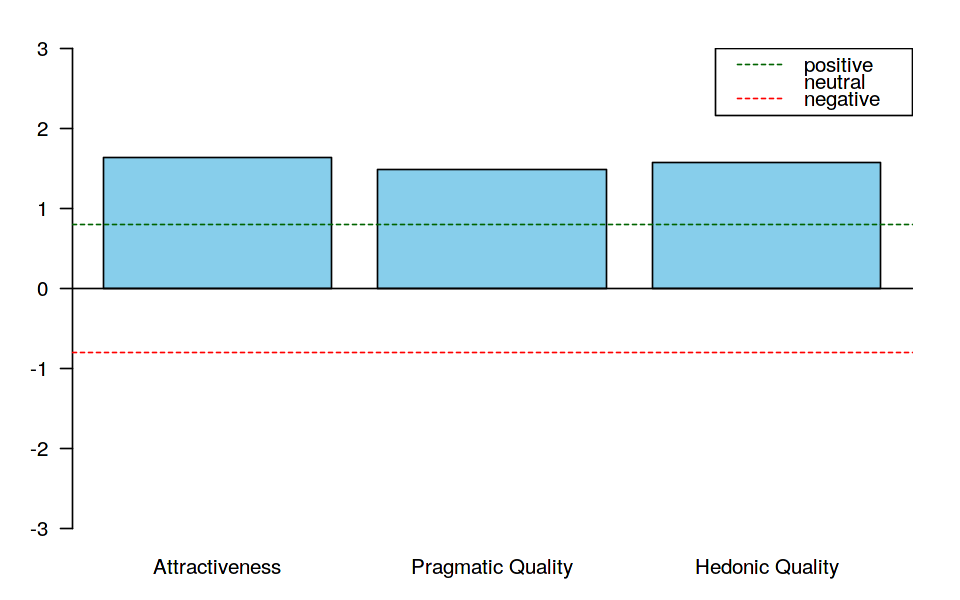

In [27]:
options(repr.plot.width=8, repr.plot.height=5)
## plot by grouped dimensions
par(mar = c(3, 3, 2, 2))
barplot(height = c(scales[1], mean(scales[2:4]), mean(scales[5:6])), col = "skyblue", ylim = c(-3,3), las = 1,
        names.arg = c("Attractiveness", "Pragmatic Quality", "Hedonic Quality"))
abline(h = 0.8, col = "darkgreen", lty = 2)
abline(h = -0.8, col = "red", lty = 2)
abline(h=0)
legend("topright", c("positive","neutral", "negative"), lty = 2, col = c("darkgreen", "white", "red"))

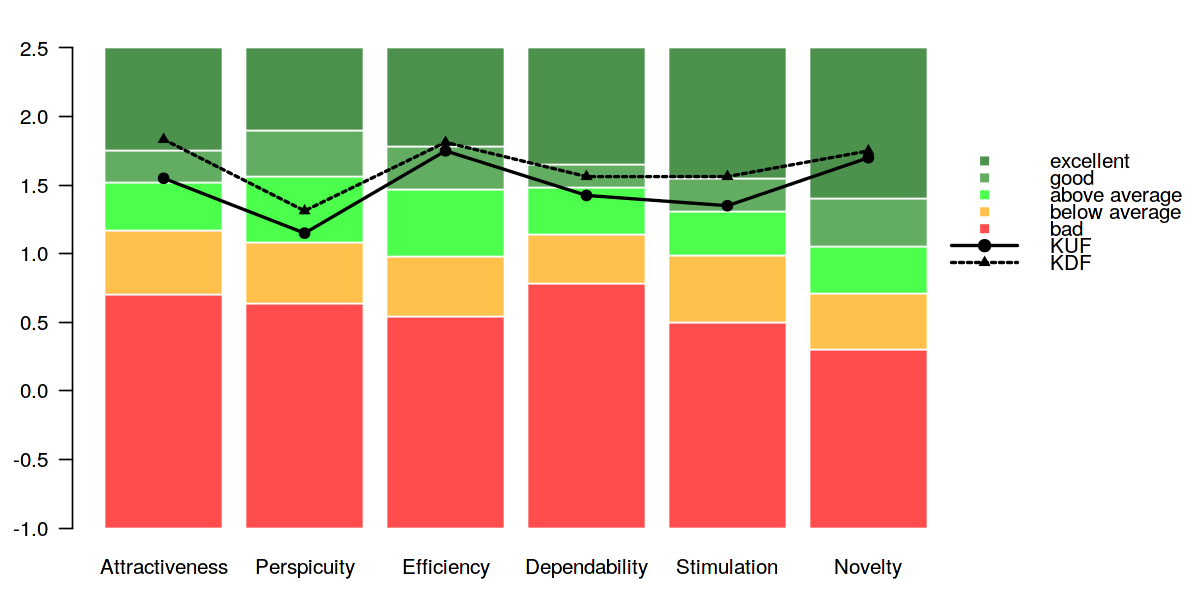

In [28]:
options(repr.plot.width=10, repr.plot.height=5)

## benchmark plot
par(mar = c(3, 3, 2, 10), xpd = TRUE)
plot2 <- barplot(as.matrix(tabBM), names.arg = dimensions, ylim = c(-1,2.5), las = 1, 
                 col = c(scales::alpha(c("white", colors), 0.7)), border = "white")

    ## 1st group = KUF (teachers)
    lines(plot2, scales_KUF, lwd = 2)
    points(plot2, scales_KUF, pch = 19)
    ## 2nd group = KDF (doctoral students)
    lines(plot2, scales_KDF, lwd = 2, lty = 2)
    points(plot2, scales_KDF, pch = 17)

legend("topright", inset = c(-0.4, 0.2), bty = "n",
       legend = c(rev(rownames(tabBM)[2:6]), "KUF", "KDF"),
       col = c(scales::alpha(rev(colors), 0.7), "black", "black"),
       pch = c(15, 15, 15, 15, 15, 19, 17), 
       lwd = c(NA, NA, NA, NA, NA, 2, 2),
       lty = c(NA, NA, NA, NA, NA, 1, 2))

In [14]:
## scale consistency - UEQ
alpha(DT[,1:26])

## scale consistencydimensions of UEQ
alpha(DT[,Attractiveness])
alpha(DT[,Perspicuity])
alpha(DT[,Efficiency])
alpha(DT[,Dependability])
alpha(DT[,Stimulation])
alpha(DT[,Novelty])

0.913657530924084

0.77498496692724

0.624880513450772

0.333944206882509

0.564452015900057

0.580342268665758

0.138004246284501